# Test Machine Learning Model Generated Odds with 2019 Data

This scrypt will use weighted random selection to choose a winning team, based off of the odds generated by GenerateOdds.ipynb. 
This scrypt relies on Object Oriented programming to develop the different models.
Because each tournament has a different structure, a different class is generated for each tournament.  the tournaments themselves are invoked at the end. 
The big east tournament and big 12 tournaments are further presented as html files. These will be saved to the folder in which this scrypt is located. 

The remaining 4 conference tournaments are not represented in a html visual; however, the games for each are predicted. For application, a visual representation of a completed tournament bracket is useful but not necessary for application of the predictive model.

In [151]:
## our imports for the model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import Counter

In [152]:
# need to read in the odds generated from GenerateOdds.ipynb
odds = pd.read_csv('2019_tournament_o2odds.csv', delimiter='\t', encoding="utf-8-sig", index_col=[0])


## Class: Game 

In [153]:
### need to create a class for a game
class game:
	def __init__(self, team1, team2):
		self.team1 = team1
		self.team2 = team2
	# get the game odds

	def displayTeams(self):
		print("team 1 : ", self.team1,  ", team 2 ", self.team2)

	def setGameOdds(self):
		team1 = self.team1
		team2 = self.team2 
		# need to  check both lists of teams for both inputs
		team1Index1 = odds[odds['First_Team']==self.team1].index.values.astype(int)	# get the index of the first team
		team1Index2 = odds[odds['Second_Team']==self.team1].index.values.astype(int)
		team1Index = np.hstack((team1Index1 , team1Index2))	# use this for numpyArrays
		# now for the second team
		team2Index1 = odds[odds['First_Team']==self.team2].index.values.astype(int)	# get the index of the second team
		team2Index2 = odds[odds['Second_Team']==self.team2].index.values.astype(int)
		team2Index = np.hstack((team2Index1 , team2Index2))
		
		# need to set which is the correct first team  
		# the following loop switches the teams if the game odds occur whith the teams
		if len(set(team1Index1).intersection(team2Index2)) == 0:
			self.team1 = team2
			self.team2 = team1

		gameIndex = set(team1Index).intersection(team2Index).pop()				# find their intersection
		team1Probablility = odds.iloc[gameIndex,2]
		self.team1Probablility = team1Probablility								# get the odds for this game
        
	def setGameOddsEven(self):
		team1 = self.team1
		team2 = self.team2 
		self.team1ProbablilityEven = 0.5								# get the odds for this gam

	def getOdds(self):
		print(self.team1 , " has he the following odds to win:  " ,  self.team1Probablility , " against " , self.team2)
	
	# select the Winner using a weighted random selection
	def selectWinner(self):
		winningTeam = ""						# placeholder
		val = random.uniform(0,1)				# pick a random value between 0,1
		if val < self.team1Probablility:		# use this to pick the team, if less than odds select team 1
			winningTeam = self.team1
		else:									# if number is greater than odds, select team 2
			winningTeam = self.team2
		return winningTeam	

	def selectWinnerEven(self):
		winningTeam = ""						# placeholder
		val = random.uniform(0,1)				# pick a random value between 0,1
		if val < self.team1ProbablilityEven:		# use this to pick the team, if less than odds select team 1
			winningTeam = self.team1
		else:									# if number is greater than odds, select team 2
			winningTeam = self.team2
		return winningTeam	

## Class: Big East Tournament 

In [154]:

class bigEastTournament:
	# teamSeeding is a list with the teams listed in increasing seed [first seed, second seed , ...]
	def __init__(self, teamSeeding):
		self.teams = teamSeeding

	# this will display the teams in the tournament
	def displayTeams(self):
		print(self.teams)

	def playGames(self):
		teams = self.teams  		# call in the games

		# first game of the tournament
		game1 = game(teams[8], teams[7])   # create a game object with 8, and 9 seed teams
		game1.setGameOdds()
		self.winner_1 = game1.selectWinner()
		winner_1 = self.winner_1
		# second game of the tournamentt
		game2 = game(teams[6], teams[9])   # create a game object with 7, and 10 seed teams
		game2.setGameOdds()
		self.winner_2 = game2.selectWinner()
		winner_2 = self.winner_2		
## second round
		# third game of the tournament
		game3 = game(winner_1 , teams[0])
		game3.setGameOdds()
		winner_3 = game3.selectWinner()
		self.winner_3 = winner_3

		# fourth game of the tournament
		game4 = game(teams[3] , teams[4])
		game4.setGameOdds()
		winner_4 = game4.selectWinner()
		self.winner_4 = winner_4		

		# fifth game of the tournament
		game5 = game(winner_2 , teams[1])
		game5.setGameOdds()
		winner_5 = game5.selectWinner()
		self.winner_5 = winner_5

		# sixth game of the tournament
		game6 = game(teams[5] , teams[2])
		game6.setGameOdds()
		winner_6 = game6.selectWinner()
		self.winner_6 = winner_6
## third Round
		# seventh game of the tournament 
		game7 = game(winner_3 , winner_4)
		game7.setGameOdds()
		winner_7 = game7.selectWinner()
		self.winner_7 = winner_7

		# eigth game of the tournament
		game8 = game(winner_5 , winner_6)
		game8.setGameOdds()
		winner_8 = game8.selectWinner()
		self.winner_8 = winner_8
# championship
		# ninth game of the tournament
		game9 = game(winner_7 , winner_8)
		game9.setGameOdds()
		winner_9 = game9.selectWinner()
		self.winner_9 = winner_9		
        
# now play games for even odds
	def playGamesEven(self):
		teams = self.teams  		# call in the games

		# first game of the tournament
		game1 = game(teams[8], teams[7])   # create a game object with 8, and 9 seed teams
		game1.setGameOddsEven()
		self.winner_1 = game1.selectWinnerEven()
		winner_1 = self.winner_1
		# second game of the tournamentt
		game2 = game(teams[6], teams[9])   # create a game object with 7, and 10 seed teams
		game2.setGameOddsEven()
		self.winner_2 = game2.selectWinnerEven()
		winner_2 = self.winner_2		
## second round
		# third game of the tournament
		game3 = game(winner_1 , teams[0])
		game3.setGameOddsEven()
		winner_3 = game3.selectWinnerEven()
		self.winner_3 = winner_3

		# fourth game of the tournament
		game4 = game(teams[3] , teams[4])
		game4.setGameOddsEven()
		winner_4 = game4.selectWinnerEven()
		self.winner_4 = winner_4		

		# fifth game of the tournament
		game5 = game(winner_2 , teams[1])
		game5.setGameOddsEven()
		winner_5 = game5.selectWinnerEven()
		self.winner_5 = winner_5

		# sixth game of the tournament
		game6 = game(teams[5] , teams[2])
		game6.setGameOddsEven()
		winner_6 = game6.selectWinnerEven()
		self.winner_6 = winner_6
## third Round
		# seventh game of the tournament 
		game7 = game(winner_3 , winner_4)
		game7.setGameOddsEven()
		winner_7 = game7.selectWinnerEven()
		self.winner_7 = winner_7

		# eigth game of the tournament
		game8 = game(winner_5 , winner_6)
		game8.setGameOddsEven()
		winner_8 = game8.selectWinnerEven()
		self.winner_8 = winner_8
# championship
		# ninth game of the tournament
		game9 = game(winner_7 , winner_8)
		game9.setGameOddsEven()
		winner_9 = game9.selectWinnerEven()
		self.winner_9 = winner_9		

# the rest of this class is dedicated to making the HTML file

	def getSVGPos(self , chord , round , level , start_or_fin):
		start_1x = 10
		start_1y = 10
		team_spacing_y = 20
		team_spacing_x = 30
		game_length = 25

		if chord == 'x':
			if start_or_fin == 0:		
				val = start_1x + (round -1) * team_spacing_x
			else:
				val = start_1x + (round -1) * team_spacing_x + game_length
		else:	
			val = start_1y + (level -1) * team_spacing_y



		return val 
# write the tournament bracket to an svg file
	def generateBigEastList(self):
		outList = []

		fontSize = 4
		adjust = 1


# game 1
		#lines
		outList.append('<line  x1="' + str(self.getSVGPos( 'x' , 1 , 1 , 0)) +  '" y1="' + str(self.getSVGPos( 'y' , 1 , 1 , 0))+ '"  x2="' + str(self.getSVGPos( 'x' , 1 ,1 , 1)) + '" y2="' + str(self.getSVGPos( 'y' , 1 , 1 , 1)) + '" stroke = "black"  /> \n')	
		outList.append('<line  x1="' +str(self.getSVGPos( 'x' , 1 , 2 , 0))  +  '" y1="' + str(self.getSVGPos( 'y' , 1 , 2 , 0))  + '"  x2="' + str(self.getSVGPos( 'x' , 1 , 2 , 1)) + '" y2="' + str(self.getSVGPos( 'y' , 1 , 2, 1))  + '" stroke = "black"  /> \n')	
		# teams
		outList.append('<text   x="' + str(self.getSVGPos( 'x' , 1 , 1 , 0) + adjust) +  '" y="' + str(self.getSVGPos( 'y' , 1 , 1 , 0) - adjust)+ '" font-size = "' + str(fontSize) + '" >' + str(self.teams[8]) + '</text> " \n')		# game 1
		outList.append('<text  x="' +str(self.getSVGPos( 'x' , 1 , 2 , 0) + adjust)  +  '" y="' + str(self.getSVGPos( 'y' , 1 , 2 , 0) - adjust)  + '" font-size = "' + str(fontSize) + '" >' + str(self.teams[7]) + '</text> " \n')		# game 1
# game 2
		# lines
		outList.append('<line  x1="' +str(self.getSVGPos( 'x' , 1 , 5 , 0))  +  '" y1="' +str(self.getSVGPos( 'y' , 1 , 5 , 0))  + '"  x2="' + str(self.getSVGPos( 'x' ,1 , 5 , 1)) + '" y2="' + str(self.getSVGPos( 'y' , 1 , 5 , 1))  + '" stroke = "black"  /> \n')	
		outList.append('<line  x1="' +str(self.getSVGPos( 'x' , 1 , 6 , 0))  +  '" y1="' +str(self.getSVGPos( 'y' , 1 , 6 , 0))  + '"  x2="' + str(self.getSVGPos( 'x' , 1 , 6 , 1)) + '" y2="' + str(self.getSVGPos( 'y' , 1 , 6 , 1))  + '" stroke = "black"  /> \n')	
		# teams
		outList.append('<text  x="' +str(self.getSVGPos( 'x' , 1 , 5 , 0) + adjust)  +  '" y="' +str(self.getSVGPos( 'y' , 1 , 5 , 0) - adjust)  + '" font-size = "' + str(fontSize) + '" >' + str(self.teams[9]) + '</text> " \n')		# game 2
		outList.append('<text  x="' +str(self.getSVGPos( 'x' , 1 , 6 , 0) + adjust)  +  '" y="' +str(self.getSVGPos( 'y' , 1 , 6 , 0) - adjust)  + '" font-size = "' + str(fontSize) + '" >' + str(self.teams[6]) + '</text> " \n')		# game 2

# game3

		#lines
		outList.append('<line  x1="' +str(self.getSVGPos( 'x' , 2 , 1.5 , 0))  +  '" y1="' +str(self.getSVGPos( 'y' , 2 , 1.5 , 0))  + '"  x2="' + str(self.getSVGPos( 'x' , 2 , 1.5 , 1)) + '" y2="' + str(self.getSVGPos( 'y' , 2 , 1.5 , 1))  + '" stroke = "black"  /> \n')	
		outList.append('<line  x1="' +str(self.getSVGPos( 'x' , 2 , 2.5 , 0))  +  '" y1="' +str(self.getSVGPos( 'y' , 2 , 2.5 , 0))  + '"  x2="' + str(self.getSVGPos( 'x' , 2 , 2.5 , 1)) + '" y2="' + str(self.getSVGPos( 'y' , 2 , 2.5 , 1))  + '" stroke = "black"  /> \n')	
		#teams
		outList.append('<text  x="' +str(self.getSVGPos( 'x' , 2 , 1.5 , 0)+adjust)  +  '" y="' +str(self.getSVGPos( 'y' , 2 , 1.5 , 0) - adjust)  + '"  font-size = "' + str(fontSize) + '" >' + str(self.winner_1) + '</text> " \n') 		# game 3
		outList.append('<text  x="' +str(self.getSVGPos( 'x' , 2 , 2.5 , 0)+adjust)  +  '" y="' +str(self.getSVGPos( 'y' , 2 , 2.5 , 0)-adjust)  + '" font-size = "' + str(fontSize) + '" >' + str(self.teams[0]) + '</text> " \n') 		# game 3
# game 4
		#lines
		outList.append('<line  x1="' +str(self.getSVGPos( 'x' , 2 , 3.5 , 0))  +  '" y1="' +str(self.getSVGPos( 'y' , 2 , 3.5 , 0))  + '"  x2="' + str(self.getSVGPos( 'x' , 2 , 3.5 , 1)) + '" y2="' + str(self.getSVGPos( 'y' , 2 , 3.5 , 1))  + '" stroke = "black"  /> \n')	
		outList.append('<line  x1="' +str(self.getSVGPos( 'x' , 2 , 4.5 , 0))  +  '" y1="' +str(self.getSVGPos( 'y' , 2 , 4.5 , 0))  + '"  x2="' + str(self.getSVGPos( 'x' , 2 , 4.5 , 1)) + '" y2="' + str(self.getSVGPos( 'y' , 2 , 4.5 , 1))  + '" stroke = "black"  /> \n')	
		# teams
		outList.append('<text   x="' +str(self.getSVGPos( 'x' , 2 , 3.5 , 0) + adjust)  +  '" y="' +str(self.getSVGPos( 'y' , 2 , 3.5 , 0)-adjust)  + '" font-size = "' + str(fontSize) + '" >' + str(self.teams[4]) + '</text> " \n')		# game 4
		outList.append('<text   x="' +str(self.getSVGPos( 'x' , 2 , 4.5 , 0) + adjust)  +  '" y="' +str(self.getSVGPos( 'y' , 2 , 4.5 , 0) - adjust) + '" font-size = "' + str(fontSize) + '" >' + str(self.teams[3]) + '</text> " \n') 	# game 4
# game 5
		#lines
		outList.append('<line  x1="' +str(self.getSVGPos( 'x' , 2 , 5.5 , 0))  +  '" y1="' +str(self.getSVGPos( 'y' , 2 , 5.5 , 0))  + '"  x2="' + str(self.getSVGPos( 'x' , 2 , 5.5 , 1)) + '" y2="' + str(self.getSVGPos( 'y' , 2 , 5.5 , 1))  + '" stroke = "black"  /> \n')	
		outList.append('<line  x1="' +str(self.getSVGPos( 'x' , 2 , 6.5 , 0))  +  '" y1="' +str(self.getSVGPos( 'y' , 2 , 6.5 , 0))  + '"  x2="' + str(self.getSVGPos( 'x' , 2 , 6.5 , 1)) + '" y2="' + str(self.getSVGPos( 'y' , 2 , 6.5 , 1))  + '" stroke = "black"  /> \n')	
		#teams
		outList.append('<text  x="' +str(self.getSVGPos( 'x' , 2 , 5.5 , 0) + adjust)  +  '" y="' +str(self.getSVGPos( 'y' , 2 , 5.5 , 0) - adjust)  + '"  font-size = "' + str(fontSize) + '" >' + str(self.winner_2) + '</text> " \n')		# game 5		
		outList.append('<text  x="' +str(self.getSVGPos( 'x' , 2 , 6.5 , 0) + adjust)  +  '" y="' +str(self.getSVGPos( 'y' , 2 , 6.5 , 0) - adjust)  + '"  font-size = "' + str(fontSize) + '" >' + str(self.teams[1]) + '</text> " \n')		# game 5
# game 6
		#lines
		outList.append('<line  x1="' +str(self.getSVGPos( 'x' , 2 , 7.5 , 0))  +  '" y1="' +str(self.getSVGPos( 'y' , 2 , 7.5 , 0))  + '"  x2="' + str(self.getSVGPos( 'x' , 2 , 7.5 , 1)) + '" y2="' + str(self.getSVGPos( 'y' , 2 , 7.5 , 1))  + '" stroke = "black"  /> \n')	
		outList.append('<line  x1="' +str(self.getSVGPos( 'x' , 2 , 8.5 , 0))  +  '" y1="' +str(self.getSVGPos( 'y' , 2 , 8.5 , 0))  + '"  x2="' + str(self.getSVGPos( 'x' , 2 , 8.5 , 1)) + '" y2="' + str(self.getSVGPos( 'y' , 2 , 8.5 , 1))  + '" stroke = "black"  /> \n')	
		#teams
		outList.append('<text  x="' +str(self.getSVGPos( 'x' , 2 , 7.5 , 0) + adjust)  +  '" y="' +str(self.getSVGPos( 'y' , 2 , 7.5 , 0) - adjust)  + '" font-size = "' + str(fontSize) + '" >' + str(self.teams[5]) + '</text> " \n')		# game 6
		outList.append('<text x="' +str(self.getSVGPos( 'x' , 2 , 8.5 , 0) + adjust)  +  '" y="' +str(self.getSVGPos( 'y' , 2 , 8.5 , 0) - adjust)  + '"  font-size = "' + str(fontSize) + '" >' + str(self.teams[2]) + '</text> " \n')		# game 6
# game 7
		#lines
		outList.append('<line  x1="' +str(self.getSVGPos( 'x' , 3 , 2 , 0))  +  '" y1="' +str(self.getSVGPos( 'y' , 3 , 2 , 0))  + '"  x2="' + str(self.getSVGPos( 'x' , 3 , 2 , 1)) + '" y2="' + str(self.getSVGPos( 'y' , 3 , 2 , 1))  + '" stroke = "black"  /> \n')	
		outList.append('<line  x1="' +str(self.getSVGPos( 'x' , 3 , 4 , 0))  +  '" y1="' +str(self.getSVGPos( 'y' , 3 , 4 , 0))  + '"  x2="' + str(self.getSVGPos( 'x' , 3 , 4 , 1)) + '" y2="' + str(self.getSVGPos( 'y' , 3 , 4 , 1))  + '" stroke = "black"  /> \n')	
		#teams
		outList.append('<text  x="' +str(self.getSVGPos( 'x' , 3 , 2 , 0) + adjust)  +  '" y="' +str(self.getSVGPos( 'y' , 3 , 2 , 0) - adjust)  + '"  font-size = "' + str(fontSize) + '" >' + str(self.winner_3) + '</text> " \n')		# game 7
		outList.append('<text  x="' +str(self.getSVGPos( 'x' , 3 , 4 , 0) + adjust)  +  '" y="' +str(self.getSVGPos( 'y' , 3 , 4 , 0) - adjust)  + '" font-size = "' + str(fontSize) + '" >' + str(self.winner_4) + '</text> " \n')	# game 7
# game 8
		# lines
		outList.append('<line  x1="' +str(self.getSVGPos( 'x' , 3 , 6 , 0))  +  '" y1="' +str(self.getSVGPos( 'y' , 3 , 6 , 0))  + '"  x2="' + str(self.getSVGPos( 'x' , 3 , 6 , 1)) + '" y2="' + str(self.getSVGPos( 'y' , 3 , 6 , 1))  + '" stroke = "black"  /> \n')	
		outList.append('<line  x1="' +str(self.getSVGPos( 'x' , 3 , 8 , 0))  +  '" y1="' +str(self.getSVGPos( 'y' , 3 , 8 , 0))  + '"  x2="' + str(self.getSVGPos( 'x' , 3 , 8 , 1)) + '" y2="' + str(self.getSVGPos( 'y' , 3 , 8 , 1))  + '" stroke = "black"  /> \n')	
		# teams
		outList.append('<text  x="' +str(self.getSVGPos( 'x' , 3 , 6 , 0) + adjust)  +  '" y="' +str(self.getSVGPos( 'y' , 3 , 6 , 0) - adjust)  + '"   font-size = "' + str(fontSize) + '" >' + str(self.winner_5) + '</text> " \n')	# game 8		
		outList.append('<text  x="' +str(self.getSVGPos( 'x' , 3 , 8 , 0) + adjust)  +  '" y="' +str(self.getSVGPos( 'y' , 3 , 8 , 0) - adjust)  + '"  font-size = "' + str(fontSize) + '" >' + str(self.winner_6) + '</text> " \n')	# game 8
# game 9
		# lines
		outList.append('<line  x1="' +str(self.getSVGPos( 'x' , 4 , 3 , 0))  +  '" y1="' +str(self.getSVGPos( 'y' , 4 , 3 , 0))  + '"  x2="' + str(self.getSVGPos( 'x' , 4 , 3 , 1)) + '" y2="' + str(self.getSVGPos( 'y' , 4 , 3 , 1))  + '" stroke = "black"  /> \n')	
		outList.append('<line  x1="' +str(self.getSVGPos( 'x' , 4 , 7 , 0))  +  '" y1="' +str(self.getSVGPos( 'y' , 4 , 7 , 0))  + '"  x2="' + str(self.getSVGPos( 'x' , 4 , 7 , 1)) + '" y2="' + str(self.getSVGPos( 'y' , 4 , 7 , 1))  + '" stroke = "black"  /> \n')	
		# teams
		outList.append('<text  x="' +str(self.getSVGPos( 'x' , 4 , 3 , 0) + adjust)  +  '" y="' +str(self.getSVGPos( 'y' , 4 , 3 , 0) - adjust)  + '"font-size = "' + str(fontSize) + '" >' + str(self.winner_7) + '</text> " \n')		# game 9
		outList.append('<text  x="' +str(self.getSVGPos( 'x' , 4 , 7 , 0) + adjust)  +  '" y="' +str(self.getSVGPos( 'y' , 4 , 7 , 0) - adjust)  + '" font-size = "' + str(fontSize) + '" >' + str(self.winner_8) + '</text> " \n')	# game 9
# champion
		# lines
		outList.append('<line  x1="' +str(self.getSVGPos( 'x' , 5, 5 , 0))  +  '" y1="' +str(self.getSVGPos( 'y' , 5 , 5 , 0))  + '"  x2="' + str(self.getSVGPos( 'x' , 5, 5 , 1)) + '" y2="' + str(self.getSVGPos( 'y' , 5 , 5 , 1))  + '" stroke = "black"  /> \n')	
		# team
		outList.append('<text   x="' +str(self.getSVGPos( 'x' , 5, 5 , 0) + adjust)  +  '" y="' +str(self.getSVGPos( 'y' , 5 , 5 , 0) - adjust)  + '" font-size = "' + str(fontSize) + '" >' + str(self.winner_9) + '</text> " \n')	# champions

		self.outList = outList

	def generateSVG(self):

		with open('BigEast.html', 'w') as outfile:

			outfile.write('<?xml version="1.0" encoding="UTF-8" ?> \n')
	            # Write SVG declaration
			outfile.write('<svg viewBox="0 0 300 300" xmlns="http://www.w3.org/2000/svg" viewBox="0 0 800 800" version="1.1">\n')
	            # Map to str all branches and write it into file
			outfile.writelines(map(str, self.outList))
	            # End of SVG file
			outfile.write('</svg>\n')


## Class: Big 12 Tournament 

In [155]:

class big12Tournament:
	# teamSeeding is a list with the teams listed in increasing seed [first seed, second seed , ...]
	def __init__(self, teamSeeding):
		self.teams = teamSeeding

	# this will display the teams in the tournament
	def displayTeams(self):
		print(self.teams)

	def playGames(self):
		teams = self.teams  		# call in the games

		# first game of the tournament
		game1 = game(teams[8], teams[7])   # create a game object with 8, and 9 seed teams
		game1.setGameOdds()
		self.winner_1 = game1.selectWinner()
		winner_1 = self.winner_1
		# second game of the tournamentt
		game2 = game(teams[6], teams[9])   # create a game object with 7, and 10 seed teams
		game2.setGameOdds()
		self.winner_2 = game2.selectWinner()
		winner_2 = self.winner_2		
## second round
		# third game of the tournament
		game3 = game(winner_1 , teams[0])
		game3.setGameOdds()
		winner_3 = game3.selectWinner()
		self.winner_3 = winner_3

		# fourth game of the tournament
		game4 = game(teams[3] , teams[4])
		game4.setGameOdds()
		winner_4 = game4.selectWinner()
		self.winner_4 = winner_4		

		# fifth game of the tournament
		game5 = game(winner_2 , teams[1])
		game5.setGameOdds()
		winner_5 = game5.selectWinner()
		self.winner_5 = winner_5

		# sixth game of the tournament
		game6 = game(teams[5] , teams[2])
		game6.setGameOdds()
		winner_6 = game6.selectWinner()
		self.winner_6 = winner_6
## third Round
		# seventh game of the tournament 
		game7 = game(winner_3 , winner_4)
		game7.setGameOdds()
		winner_7 = game7.selectWinner()
		self.winner_7 = winner_7

		# eigth game of the tournament
		game8 = game(winner_5 , winner_6)
		game8.setGameOdds()
		winner_8 = game8.selectWinner()
		self.winner_8 = winner_8
# championship
		# ninth game of the tournament
		game9 = game(winner_7 , winner_8)
		game9.setGameOdds()
		winner_9 = game9.selectWinner()
		self.winner_9 = winner_9		


	def playGamesEven(self):
		teams = self.teams  		# call in the games

		# first game of the tournament
		game1 = game(teams[8], teams[7])   # create a game object with 8, and 9 seed teams
		game1.setGameOddsEven()
		self.winner_1 = game1.selectWinnerEven()
		winner_1 = self.winner_1
		# second game of the tournamentt
		game2 = game(teams[6], teams[9])   # create a game object with 7, and 10 seed teams
		game2.setGameOddsEven()
		self.winner_2 = game2.selectWinnerEven()
		winner_2 = self.winner_2		
## second round
		# third game of the tournament
		game3 = game(winner_1 , teams[0])
		game3.setGameOddsEven()
		winner_3 = game3.selectWinnerEven()
		self.winner_3 = winner_3

		# fourth game of the tournament
		game4 = game(teams[3] , teams[4])
		game4.setGameOddsEven()
		winner_4 = game4.selectWinnerEven()
		self.winner_4 = winner_4		

		# fifth game of the tournament
		game5 = game(winner_2 , teams[1])
		game5.setGameOddsEven()
		winner_5 = game5.selectWinnerEven()
		self.winner_5 = winner_5

		# sixth game of the tournament
		game6 = game(teams[5] , teams[2])
		game6.setGameOddsEven()
		winner_6 = game6.selectWinnerEven()
		self.winner_6 = winner_6
## third Round
		# seventh game of the tournament 
		game7 = game(winner_3 , winner_4)
		game7.setGameOddsEven()
		winner_7 = game7.selectWinnerEven()
		self.winner_7 = winner_7

		# eigth game of the tournament
		game8 = game(winner_5 , winner_6)
		game8.setGameOddsEven()
		winner_8 = game8.selectWinnerEven()
		self.winner_8 = winner_8
# championship
		# ninth game of the tournament
		game9 = game(winner_7 , winner_8)
		game9.setGameOddsEven()
		winner_9 = game9.selectWinnerEven()
		self.winner_9 = winner_9		
        
# the rest of this class is dedicated to making the HTML file
	def getSVGPos(self , chord , round , level , start_or_fin):
		start_1x = 10
		start_1y = 10
		team_spacing_y = 20
		team_spacing_x = 30
		game_length = 25

		if chord == 'x':
			if start_or_fin == 0:		
				val = start_1x + (round -1) * team_spacing_x
			else:
				val = start_1x + (round -1) * team_spacing_x + game_length
		else:	
			val = start_1y + (level -1) * team_spacing_y



		return val 

	def generateBig12List(self):
		outList = []

		fontSize = 4
		adjust = 1

# game 1
		#lines
		outList.append('<line  x1="' + str(self.getSVGPos( 'x' , 1 , 4 , 0)) +  '" y1="' + str(self.getSVGPos( 'y' , 1 , 4 , 0))+ '"  x2="' + str(self.getSVGPos( 'x' , 1 ,4 , 1)) + '" y2="' + str(self.getSVGPos( 'y' , 1 , 4 , 1)) + '" stroke = "black"  /> \n')	
		outList.append('<line  x1="' +str(self.getSVGPos( 'x' , 1 , 5 , 0))  +  '" y1="' + str(self.getSVGPos( 'y' , 1 , 5 , 0))  + '"  x2="' + str(self.getSVGPos( 'x' , 1 , 5 , 1)) + '" y2="' + str(self.getSVGPos( 'y' , 1 , 5, 1))  + '" stroke = "black"  /> \n')	
		# teams
		outList.append('<text   x="' + str(self.getSVGPos( 'x' , 1 , 4 , 0) + adjust) +  '" y="' + str(self.getSVGPos( 'y' , 1 , 4 , 0) - adjust)+ '" font-size = "' + str(fontSize) + '" >' + str(self.teams[7]) + '</text> " \n')		# game 1
		outList.append('<text  x="' +str(self.getSVGPos( 'x' , 1 , 5 , 0) + adjust)  +  '" y="' + str(self.getSVGPos( 'y' , 1 , 5 , 0) - adjust)  + '" font-size = "' + str(fontSize) + '" >' + str(self.teams[8]) + '</text> " \n')		# game 1
# game 2
		# lines
		outList.append('<line  x1="' +str(self.getSVGPos( 'x' , 1 , 6 , 0))  +  '" y1="' +str(self.getSVGPos( 'y' , 1 , 6 , 0))  + '"  x2="' + str(self.getSVGPos( 'x' ,1 , 6 , 1)) + '" y2="' + str(self.getSVGPos( 'y' , 1 , 6 , 1))  + '" stroke = "black"  /> \n')	
		outList.append('<line  x1="' +str(self.getSVGPos( 'x' , 1 , 7 , 0))  +  '" y1="' +str(self.getSVGPos( 'y' , 1 , 7 , 0))  + '"  x2="' + str(self.getSVGPos( 'x' , 1 , 7 , 1)) + '" y2="' + str(self.getSVGPos( 'y' , 1 , 7 , 1))  + '" stroke = "black"  /> \n')	
		# teams
		outList.append('<text  x="' +str(self.getSVGPos( 'x' , 1 , 6 , 0) + adjust)  +  '" y="' +str(self.getSVGPos( 'y' , 1 , 6 , 0) - adjust)  + '" font-size = "' + str(fontSize) + '" >' + str(self.teams[6]) + '</text> " \n')		# game 2
		outList.append('<text  x="' +str(self.getSVGPos( 'x' , 1 , 7 , 0) + adjust)  +  '" y="' +str(self.getSVGPos( 'y' , 1 , 7 , 0) - adjust)  + '" font-size = "' + str(fontSize) + '" >' + str(self.teams[9]) + '</text> " \n')		# game 2

# game3

		#lines
		outList.append('<line  x1="' +str(self.getSVGPos( 'x' , 2 , 1.5 , 0))  +  '" y1="' +str(self.getSVGPos( 'y' , 2 , 1.5 , 0))  + '"  x2="' + str(self.getSVGPos( 'x' , 2 , 1.5 , 1)) + '" y2="' + str(self.getSVGPos( 'y' , 2 , 1.5 , 1))  + '" stroke = "black"  /> \n')	
		outList.append('<line  x1="' +str(self.getSVGPos( 'x' , 2 , 2.5 , 0))  +  '" y1="' +str(self.getSVGPos( 'y' , 2 , 2.5 , 0))  + '"  x2="' + str(self.getSVGPos( 'x' , 2 , 2.5 , 1)) + '" y2="' + str(self.getSVGPos( 'y' , 2 , 2.5 , 1))  + '" stroke = "black"  /> \n')	
		#teams
		outList.append('<text  x="' +str(self.getSVGPos( 'x' , 2 , 1.5 , 0)+adjust)  +  '" y="' +str(self.getSVGPos( 'y' , 2 , 1.5 , 0) - adjust)  + '"  font-size = "' + str(fontSize) + '" >' + str(self.teams[3]) + '</text> " \n') 		# game 3
		outList.append('<text  x="' +str(self.getSVGPos( 'x' , 2 , 2.5 , 0)+adjust)  +  '" y="' +str(self.getSVGPos( 'y' , 2 , 2.5 , 0)-adjust)  + '" font-size = "' + str(fontSize) + '" >' + str(self.teams[4]) + '</text> " \n') 		# game 3
# game 4
		#lines
		outList.append('<line  x1="' +str(self.getSVGPos( 'x' , 2 , 3.5 , 0))  +  '" y1="' +str(self.getSVGPos( 'y' , 2 , 3.5 , 0))  + '"  x2="' + str(self.getSVGPos( 'x' , 2 , 3.5 , 1)) + '" y2="' + str(self.getSVGPos( 'y' , 2 , 3.5 , 1))  + '" stroke = "black"  /> \n')	
		outList.append('<line  x1="' +str(self.getSVGPos( 'x' , 2 , 4.5 , 0))  +  '" y1="' +str(self.getSVGPos( 'y' , 2 , 4.5 , 0))  + '"  x2="' + str(self.getSVGPos( 'x' , 2 , 4.5 , 1)) + '" y2="' + str(self.getSVGPos( 'y' , 2 , 4.5 , 1))  + '" stroke = "black"  /> \n')	
		# teams
		outList.append('<text   x="' +str(self.getSVGPos( 'x' , 2 , 3.5 , 0) + adjust)  +  '" y="' +str(self.getSVGPos( 'y' , 2 , 3.5 , 0)-adjust)  + '" font-size = "' + str(fontSize) + '" >' + str(self.teams[0]) + '</text> " \n')		# game 4
		outList.append('<text   x="' +str(self.getSVGPos( 'x' , 2 , 4.5 , 0) + adjust)  +  '" y="' +str(self.getSVGPos( 'y' , 2 , 4.5 , 0) - adjust) + '" font-size = "' + str(fontSize) + '" >' + str(self.winner_1) + '</text> " \n') 	# game 4
# game 5
		#lines
		outList.append('<line  x1="' +str(self.getSVGPos( 'x' , 2 , 5.5 , 0))  +  '" y1="' +str(self.getSVGPos( 'y' , 2 , 5.5 , 0))  + '"  x2="' + str(self.getSVGPos( 'x' , 2 , 5.5 , 1)) + '" y2="' + str(self.getSVGPos( 'y' , 2 , 5.5 , 1))  + '" stroke = "black"  /> \n')	
		outList.append('<line  x1="' +str(self.getSVGPos( 'x' , 2 , 6.5 , 0))  +  '" y1="' +str(self.getSVGPos( 'y' , 2 , 6.5 , 0))  + '"  x2="' + str(self.getSVGPos( 'x' , 2 , 6.5 , 1)) + '" y2="' + str(self.getSVGPos( 'y' , 2 , 6.5 , 1))  + '" stroke = "black"  /> \n')	
		#teams
		outList.append('<text  x="' +str(self.getSVGPos( 'x' , 2 , 5.5 , 0) + adjust)  +  '" y="' +str(self.getSVGPos( 'y' , 2 , 5.5 , 0) - adjust)  + '"  font-size = "' + str(fontSize) + '" >' + str(self.teams[1]) + '</text> " \n')		# game 5		
		outList.append('<text  x="' +str(self.getSVGPos( 'x' , 2 , 6.5 , 0) + adjust)  +  '" y="' +str(self.getSVGPos( 'y' , 2 , 6.5 , 0) - adjust)  + '"  font-size = "' + str(fontSize) + '" >' + str(self.winner_2) + '</text> " \n')		# game 5
# game 6
		#lines
		outList.append('<line  x1="' +str(self.getSVGPos( 'x' , 2 , 7.5 , 0))  +  '" y1="' +str(self.getSVGPos( 'y' , 2 , 7.5 , 0))  + '"  x2="' + str(self.getSVGPos( 'x' , 2 , 7.5 , 1)) + '" y2="' + str(self.getSVGPos( 'y' , 2 , 7.5 , 1))  + '" stroke = "black"  /> \n')	
		outList.append('<line  x1="' +str(self.getSVGPos( 'x' , 2 , 8.5 , 0))  +  '" y1="' +str(self.getSVGPos( 'y' , 2 , 8.5 , 0))  + '"  x2="' + str(self.getSVGPos( 'x' , 2 , 8.5 , 1)) + '" y2="' + str(self.getSVGPos( 'y' , 2 , 8.5 , 1))  + '" stroke = "black"  /> \n')	
		#teams
		outList.append('<text  x="' +str(self.getSVGPos( 'x' , 2 , 7.5 , 0) + adjust)  +  '" y="' +str(self.getSVGPos( 'y' , 2 , 7.5 , 0) - adjust)  + '" font-size = "' + str(fontSize) + '" >' + str(self.teams[2]) + '</text> " \n')		# game 6
		outList.append('<text x="' +str(self.getSVGPos( 'x' , 2 , 8.5 , 0) + adjust)  +  '" y="' +str(self.getSVGPos( 'y' , 2 , 8.5 , 0) - adjust)  + '"  font-size = "' + str(fontSize) + '" >' + str(self.teams[5]) + '</text> " \n')		# game 6
# game 7
		#lines
		outList.append('<line  x1="' +str(self.getSVGPos( 'x' , 3 , 2 , 0))  +  '" y1="' +str(self.getSVGPos( 'y' , 3 , 2 , 0))  + '"  x2="' + str(self.getSVGPos( 'x' , 3 , 2 , 1)) + '" y2="' + str(self.getSVGPos( 'y' , 3 , 2 , 1))  + '" stroke = "black"  /> \n')	
		outList.append('<line  x1="' +str(self.getSVGPos( 'x' , 3 , 4 , 0))  +  '" y1="' +str(self.getSVGPos( 'y' , 3 , 4 , 0))  + '"  x2="' + str(self.getSVGPos( 'x' , 3 , 4 , 1)) + '" y2="' + str(self.getSVGPos( 'y' , 3 , 4 , 1))  + '" stroke = "black"  /> \n')	
		#teams
		outList.append('<text  x="' +str(self.getSVGPos( 'x' , 3 , 2 , 0) + adjust)  +  '" y="' +str(self.getSVGPos( 'y' , 3 , 2 , 0) - adjust)  + '"  font-size = "' + str(fontSize) + '" >' + str(self.winner_4) + '</text> " \n')		# game 7
		outList.append('<text  x="' +str(self.getSVGPos( 'x' , 3 , 4 , 0) + adjust)  +  '" y="' +str(self.getSVGPos( 'y' , 3 , 4 , 0) - adjust)  + '" font-size = "' + str(fontSize) + '" >' + str(self.winner_3) + '</text> " \n')	# game 7
# game 8
		# lines
		outList.append('<line  x1="' +str(self.getSVGPos( 'x' , 3 , 6 , 0))  +  '" y1="' +str(self.getSVGPos( 'y' , 3 , 6 , 0))  + '"  x2="' + str(self.getSVGPos( 'x' , 3 , 6 , 1)) + '" y2="' + str(self.getSVGPos( 'y' , 3 , 6 , 1))  + '" stroke = "black"  /> \n')	
		outList.append('<line  x1="' +str(self.getSVGPos( 'x' , 3 , 8 , 0))  +  '" y1="' +str(self.getSVGPos( 'y' , 3 , 8 , 0))  + '"  x2="' + str(self.getSVGPos( 'x' , 3 , 8 , 1)) + '" y2="' + str(self.getSVGPos( 'y' , 3 , 8 , 1))  + '" stroke = "black"  /> \n')	
		# teams
		outList.append('<text  x="' +str(self.getSVGPos( 'x' , 3 , 6 , 0) + adjust)  +  '" y="' +str(self.getSVGPos( 'y' , 3 , 6 , 0) - adjust)  + '"   font-size = "' + str(fontSize) + '" >' + str(self.winner_5) + '</text> " \n')	# game 8		
		outList.append('<text  x="' +str(self.getSVGPos( 'x' , 3 , 8 , 0) + adjust)  +  '" y="' +str(self.getSVGPos( 'y' , 3 , 8 , 0) - adjust)  + '"  font-size = "' + str(fontSize) + '" >' + str(self.winner_6) + '</text> " \n')	# game 8
# game 9
		# lines
		outList.append('<line  x1="' +str(self.getSVGPos( 'x' , 4 , 3 , 0))  +  '" y1="' +str(self.getSVGPos( 'y' , 4 , 3 , 0))  + '"  x2="' + str(self.getSVGPos( 'x' , 4 , 3 , 1)) + '" y2="' + str(self.getSVGPos( 'y' , 4 , 3 , 1))  + '" stroke = "black"  /> \n')	
		outList.append('<line  x1="' +str(self.getSVGPos( 'x' , 4 , 7 , 0))  +  '" y1="' +str(self.getSVGPos( 'y' , 4 , 7 , 0))  + '"  x2="' + str(self.getSVGPos( 'x' , 4 , 7 , 1)) + '" y2="' + str(self.getSVGPos( 'y' , 4 , 7 , 1))  + '" stroke = "black"  /> \n')	
		# teams
		outList.append('<text  x="' +str(self.getSVGPos( 'x' , 4 , 3 , 0) + adjust)  +  '" y="' +str(self.getSVGPos( 'y' , 4 , 3 , 0) - adjust)  + '"font-size = "' + str(fontSize) + '" >' + str(self.winner_7) + '</text> " \n')		# game 9
		outList.append('<text  x="' +str(self.getSVGPos( 'x' , 4 , 7 , 0) + adjust)  +  '" y="' +str(self.getSVGPos( 'y' , 4 , 7 , 0) - adjust)  + '" font-size = "' + str(fontSize) + '" >' + str(self.winner_8) + '</text> " \n')	# game 9
# champion
		# lines
		outList.append('<line  x1="' +str(self.getSVGPos( 'x' , 5, 5 , 0))  +  '" y1="' +str(self.getSVGPos( 'y' , 5 , 5 , 0))  + '"  x2="' + str(self.getSVGPos( 'x' , 5, 5 , 1)) + '" y2="' + str(self.getSVGPos( 'y' , 5 , 5 , 1))  + '" stroke = "black"  /> \n')	
		# team
		outList.append('<text   x="' +str(self.getSVGPos( 'x' , 5, 5 , 0) + adjust)  +  '" y="' +str(self.getSVGPos( 'y' , 5 , 5 , 0) - adjust)  + '" font-size = "' + str(fontSize) + '" >' + str(self.winner_9) + '</text> " \n')	# champions

		self.outList = outList

	def generateSVG(self):

		with open('Big12.html', 'w') as outfile:

			outfile.write('<?xml version="1.0" encoding="UTF-8" ?> \n')
	            # Write SVG declaration
			outfile.write('<svg viewBox="0 0 300 300" xmlns="http://www.w3.org/2000/svg" viewBox="0 0 800 800" version="1.1">\n')
	            # Map to str all branches and write it into file
			outfile.writelines(map(str, self.outList))
	            # End of SVG file
			outfile.write('</svg>\n')




## Class: Big 10 Tournament 

In [156]:

class big10Tournament:
	# teamSeeding is a list with the teams listed in increasing seed [first seed, second seed , ...]
	def __init__(self, teamSeeding):
		self.teams = teamSeeding

	# this will display the teams in the tournament
	def displayTeams(self):
		print(self.teams)

	def playGames(self):
		teams = self.teams  		# call in the games

		# first game of the tournament
		game1 = game(teams[12], teams[11])   # create a game object with 13 and 12 seeds
		game1.setGameOdds()
		self.winner_1 = game1.selectWinner()
		winner_1 = self.winner_1
		# second game of the tournamentt
		game2 = game(teams[13], teams[10])   # create a game object with 14 and 11
		game2.setGameOdds()
		self.winner_2 = game2.selectWinner()
		winner_2 = self.winner_2		
## second round
		# third game of the tournamentt
		game3 = game(teams[8], teams[7])   # create a game object with 8 , 9
		game3.setGameOdds()
		self.winner_3 = game3.selectWinner()
		winner_3 = self.winner_3		
    
        # fourth game
		game4 = game(winner_1 , teams[4])
		game4.setGameOdds()
		winner_4 = game4.selectWinner()
		self.winner_4 = winner_4

		# fifth game of the tournament
		game5 = game(teams[9] , teams[6])
		game5.setGameOdds()
		winner_5 = game5.selectWinner()
		self.winner_5 = winner_5		

		# sixth game of the tournament
		game6 = game(winner_2 , teams[5])
		game6.setGameOdds()
		winner_6 = game6.selectWinner()
		self.winner_6 = winner_6

## third Round
		# seventh game of the tournament 
		game7 = game(winner_3 , teams[0])
		game7.setGameOdds()
		winner_7 = game7.selectWinner()
		self.winner_7 = winner_7

		# eigth game of the tournament
		game8 = game(winner_4 , teams[3])
		game8.setGameOdds()
		winner_8 = game8.selectWinner()
		self.winner_8 = winner_8

		# ninth game of the tournament
		game9 = game(winner_5 , teams[1])
		game9.setGameOdds()
		winner_9 = game9.selectWinner()
		self.winner_9 = winner_9	
        
		# tenth game of the tournament
		game10 = game(winner_6 , teams[2])
		game10.setGameOdds()
		winner_10 = game10.selectWinner()
		self.winner_10 = winner_10	
        
        
## fourth Round
        # eleventh game of the tournament 
		game11 = game(winner_7 , winner_8)
		game11.setGameOdds()
		winner_11 = game11.selectWinner()
		self.winner_11 = winner_11	
          
        # 12th game of the tournament 
		game12 = game(winner_9 , winner_10)
		game12.setGameOdds()
		winner_12 = game12.selectWinner()
		self.winner_12 = winner_12
        
## Championship 
        # 13th game of the tournament 
		game13 = game(winner_11 , winner_12)
		game13.setGameOdds()
		winner_13 = game13.selectWinner()
		self.winner_13 = winner_13
        

	def playGamesEven(self):
		teams = self.teams  		# call in the games

		# first game of the tournament
		game1 = game(teams[12], teams[11])   # create a game object with 13 and 12 seeds
		game1.setGameOddsEven()
		self.winner_1 = game1.selectWinnerEven()
		winner_1 = self.winner_1
		# second game of the tournamentt
		game2 = game(teams[13], teams[10])   # create a game object with 14 and 11
		game2.setGameOddsEven()
		self.winner_2 = game2.selectWinnerEven()
		winner_2 = self.winner_2		
## second round
		# third game of the tournamentt
		game3 = game(teams[8], teams[7])   # create a game object with 8 , 9
		game3.setGameOddsEven()
		self.winner_3 = game3.selectWinnerEven()
		winner_3 = self.winner_3		
    
        # fourth game
		game4 = game(winner_1 , teams[4])
		game4.setGameOddsEven()
		winner_4 = game4.selectWinnerEven()
		self.winner_4 = winner_4

		# fifth game of the tournament
		game5 = game(teams[9] , teams[6])
		game5.setGameOddsEven()
		winner_5 = game5.selectWinnerEven()
		self.winner_5 = winner_5		

		# sixth game of the tournament
		game6 = game(winner_2 , teams[5])
		game6.setGameOddsEven()
		winner_6 = game6.selectWinnerEven()
		self.winner_6 = winner_6

## third Round
		# seventh game of the tournament 
		game7 = game(winner_3 , teams[0])
		game7.setGameOddsEven()
		winner_7 = game7.selectWinnerEven()
		self.winner_7 = winner_7

		# eigth game of the tournament
		game8 = game(winner_4 , teams[3])
		game8.setGameOddsEven()
		winner_8 = game8.selectWinnerEven()
		self.winner_8 = winner_8

		# ninth game of the tournament
		game9 = game(winner_5 , teams[1])
		game9.setGameOddsEven()
		winner_9 = game9.selectWinnerEven()
		self.winner_9 = winner_9	
        
		# tenth game of the tournament
		game10 = game(winner_6 , teams[2])
		game10.setGameOddsEven()
		winner_10 = game10.selectWinnerEven()
		self.winner_10 = winner_10	
        
        
## fourth Round
        # eleventh game of the tournament 
		game11 = game(winner_7 , winner_8)
		game11.setGameOddsEven()
		winner_11 = game11.selectWinnerEven()
		self.winner_11 = winner_11	
          
        # 12th game of the tournament 
		game12 = game(winner_9 , winner_10)
		game12.setGameOddsEven()
		winner_12 = game12.selectWinnerEven()
		self.winner_12 = winner_12
        
## Championship 
        # 13th game of the tournament 
		game13 = game(winner_11 , winner_12)
		game13.setGameOddsEven()
		winner_13 = game13.selectWinnerEven()
		self.winner_13 = winner_13
        
        

## Class: Pac 12 Tournament

In [157]:

class pac12Tournament:
	# teamSeeding is a list with the teams listed in increasing seed [first seed, second seed , ...]
	def __init__(self, teamSeeding):
		self.teams = teamSeeding

	# this will display the teams in the tournament
	def displayTeams(self):
		print(self.teams)

	def playGames(self):
		teams = self.teams  		# call in the games

		# first game of the tournament
		game1 = game(teams[8], teams[7])   # create a game object with 8, and 9 seed teams
		game1.setGameOdds()
		self.winner_1 = game1.selectWinner()
		winner_1 = self.winner_1
		# second game of the tournamentt
		game2 = game(teams[4], teams[11])   # create a game object with 5, and 12 seed teams
		game2.setGameOdds()
		self.winner_2 = game2.selectWinner()
		winner_2 = self.winner_2		
        
		# third game of the tournament
		game3 = game(teams[6] , teams[9])
		game3.setGameOdds()
		winner_3 = game3.selectWinner()
		self.winner_3 = winner_3

		# fourth game of the tournament
		game4 = game(teams[5] , teams[10])
		game4.setGameOdds()
		winner_4 = game4.selectWinner()
		self.winner_4 = winner_4		

## second Round
		# fifth game of the tournament
		game5 = game(winner_1 , teams[0])
		game5.setGameOdds()
		winner_5 = game5.selectWinner()
		self.winner_5 = winner_5

		# sixth game of the tournament
		game6 = game(teams[3] , winner_2)
		game6.setGameOdds()
		winner_6 = game6.selectWinner()
		self.winner_6 = winner_6

		# seventh game of the tournament 
		game7 = game(winner_3 , teams[1])
		game7.setGameOdds()
		winner_7 = game7.selectWinner()
		self.winner_7 = winner_7

		# eigth game of the tournament
		game8 = game(winner_4 , teams[2])
		game8.setGameOdds()
		winner_8 = game8.selectWinner()
		self.winner_8 = winner_8
## third round 
		# ninth game of the tournament
		game9 = game(winner_5 , winner_6)
		game9.setGameOdds()
		winner_9 = game9.selectWinner()
		self.winner_9 = winner_9		
        # tenth game
		game10 = game(winner_7 , winner_8)
		game10.setGameOdds()
		winner_10 = game10.selectWinner()
		self.winner_10 = winner_10		
        
        
## Championship 
        # 11th game
		game11 = game(winner_9 , winner_10)
		game11.setGameOdds()
		winner_11 = game11.selectWinner()
		self.winner_11 = winner_11		
        

	def playGamesEven(self):
		teams = self.teams  		# call in the games

		# first game of the tournament
		game1 = game(teams[8], teams[7])   # create a game object with 8, and 9 seed teams
		game1.setGameOddsEven()
		self.winner_1 = game1.selectWinnerEven()
		winner_1 = self.winner_1
		# second game of the tournamentt
		game2 = game(teams[4], teams[11])   # create a game object with 5, and 12 seed teams
		game2.setGameOddsEven()
		self.winner_2 = game2.selectWinnerEven()
		winner_2 = self.winner_2		
        
		# third game of the tournament
		game3 = game(teams[6] , teams[9])
		game3.setGameOddsEven()
		winner_3 = game3.selectWinnerEven()
		self.winner_3 = winner_3

		# fourth game of the tournament
		game4 = game(teams[5] , teams[10])
		game4.setGameOddsEven()
		winner_4 = game4.selectWinnerEven()
		self.winner_4 = winner_4		

## second Round
		# fifth game of the tournament
		game5 = game(winner_1 , teams[0])
		game5.setGameOddsEven()
		winner_5 = game5.selectWinnerEven()
		self.winner_5 = winner_5

		# sixth game of the tournament
		game6 = game(teams[3] , winner_2)
		game6.setGameOddsEven()
		winner_6 = game6.selectWinnerEven()
		self.winner_6 = winner_6

		# seventh game of the tournament 
		game7 = game(winner_3 , teams[1])
		game7.setGameOddsEven()
		winner_7 = game7.selectWinnerEven()
		self.winner_7 = winner_7

		# eigth game of the tournament
		game8 = game(winner_4 , teams[2])
		game8.setGameOddsEven()
		winner_8 = game8.selectWinnerEven()
		self.winner_8 = winner_8
## third round 
		# ninth game of the tournament
		game9 = game(winner_5 , winner_6)
		game9.setGameOddsEven()
		winner_9 = game9.selectWinnerEven()
		self.winner_9 = winner_9		
        # tenth game
		game10 = game(winner_7 , winner_8)
		game10.setGameOddsEven()
		winner_10 = game10.selectWinnerEven()
		self.winner_10 = winner_10		
        
        
## Championship 
        # 11th game
		game11 = game(winner_9 , winner_10)
		game11.setGameOddsEven()
		winner_11 = game11.selectWinnerEven()
		self.winner_11 = winner_11		

## Class: SEC Tournament

In [158]:

class secTournament:
	# teamSeeding is a list with the teams listed in increasing seed [first seed, second seed , ...]
	def __init__(self, teamSeeding):
		self.teams = teamSeeding

	# this will display the teams in the tournament
	def displayTeams(self):
		print(self.teams)

	def playGames(self):
		teams = self.teams  		# call in the games

		# first game of the tournament
		game1 = game(teams[12], teams[11])   # create a game object with 13 and 12 seeds
		game1.setGameOdds()
		self.winner_1 = game1.selectWinner()
		winner_1 = self.winner_1
		# second game of the tournamentt
		game2 = game(teams[13], teams[10])   # create a game object with 14 and 11
		game2.setGameOdds()
		self.winner_2 = game2.selectWinner()
		winner_2 = self.winner_2		
## second round
		# third game of the tournamentt
		game3 = game(teams[8], teams[7])   # create a game object with 8 , 9
		game3.setGameOdds()
		self.winner_3 = game3.selectWinner()
		winner_3 = self.winner_3		
    
        # fourth game
		game4 = game(winner_1 , teams[4])
		game4.setGameOdds()
		winner_4 = game4.selectWinner()
		self.winner_4 = winner_4

		# fifth game of the tournament
		game5 = game(teams[9] , teams[6])
		game5.setGameOdds()
		winner_5 = game5.selectWinner()
		self.winner_5 = winner_5		

		# sixth game of the tournament
		game6 = game(winner_2 , teams[5])
		game6.setGameOdds()
		winner_6 = game6.selectWinner()
		self.winner_6 = winner_6

## third Round
		# seventh game of the tournament 
		game7 = game(winner_3 , teams[0])
		game7.setGameOdds()
		winner_7 = game7.selectWinner()
		self.winner_7 = winner_7

		# eigth game of the tournament
		game8 = game(winner_4 , teams[3])
		game8.setGameOdds()
		winner_8 = game8.selectWinner()
		self.winner_8 = winner_8

		# ninth game of the tournament
		game9 = game(winner_5 , teams[1])
		game9.setGameOdds()
		winner_9 = game9.selectWinner()
		self.winner_9 = winner_9	
        
		# tenth game of the tournament
		game10 = game(winner_6 , teams[2])
		game10.setGameOdds()
		winner_10 = game10.selectWinner()
		self.winner_10 = winner_10	
        
        
## fourth Round
        # eleventh game of the tournament 
		game11 = game(winner_7 , winner_8)
		game11.setGameOdds()
		winner_11 = game11.selectWinner()
		self.winner_11 = winner_11	
          
        # 12th game of the tournament 
		game12 = game(winner_9 , winner_10)
		game12.setGameOdds()
		winner_12 = game12.selectWinner()
		self.winner_12 = winner_12
        
## Championship 
        # 13th game of the tournament 
		game13 = game(winner_11 , winner_12)
		game13.setGameOdds()
		winner_13 = game13.selectWinner()
		self.winner_13 = winner_13
        
        

	def playGamesEven(self):
		teams = self.teams  		# call in the games

		# first game of the tournament
		game1 = game(teams[12], teams[11])   # create a game object with 13 and 12 seeds
		game1.setGameOddsEven()
		self.winner_1 = game1.selectWinnerEven()
		winner_1 = self.winner_1
		# second game of the tournamentt
		game2 = game(teams[13], teams[10])   # create a game object with 14 and 11
		game2.setGameOddsEven()
		self.winner_2 = game2.selectWinnerEven()
		winner_2 = self.winner_2		
## second round
		# third game of the tournamentt
		game3 = game(teams[8], teams[7])   # create a game object with 8 , 9
		game3.setGameOddsEven()
		self.winner_3 = game3.selectWinnerEven()
		winner_3 = self.winner_3		
    
        # fourth game
		game4 = game(winner_1 , teams[4])
		game4.setGameOddsEven()
		winner_4 = game4.selectWinnerEven()
		self.winner_4 = winner_4

		# fifth game of the tournament
		game5 = game(teams[9] , teams[6])
		game5.setGameOddsEven()
		winner_5 = game5.selectWinnerEven()
		self.winner_5 = winner_5		

		# sixth game of the tournament
		game6 = game(winner_2 , teams[5])
		game6.setGameOddsEven()
		winner_6 = game6.selectWinnerEven()
		self.winner_6 = winner_6

## third Round
		# seventh game of the tournament 
		game7 = game(winner_3 , teams[0])
		game7.setGameOddsEven()
		winner_7 = game7.selectWinnerEven()
		self.winner_7 = winner_7

		# eigth game of the tournament
		game8 = game(winner_4 , teams[3])
		game8.setGameOddsEven()
		winner_8 = game8.selectWinnerEven()
		self.winner_8 = winner_8

		# ninth game of the tournament
		game9 = game(winner_5 , teams[1])
		game9.setGameOddsEven()
		winner_9 = game9.selectWinnerEven()
		self.winner_9 = winner_9	
        
		# tenth game of the tournament
		game10 = game(winner_6 , teams[2])
		game10.setGameOddsEven()
		winner_10 = game10.selectWinnerEven()
		self.winner_10 = winner_10	
        
        
## fourth Round
        # eleventh game of the tournament 
		game11 = game(winner_7 , winner_8)
		game11.setGameOddsEven()
		winner_11 = game11.selectWinnerEven()
		self.winner_11 = winner_11	
          
        # 12th game of the tournament 
		game12 = game(winner_9 , winner_10)
		game12.setGameOddsEven()
		winner_12 = game12.selectWinnerEven()
		self.winner_12 = winner_12
        
## Championship 
        # 13th game of the tournament 
		game13 = game(winner_11 , winner_12)
		game13.setGameOddsEven()
		winner_13 = game13.selectWinnerEven()
		self.winner_13 = winner_13
        
        

## Class: ACC Tournament

In [159]:

class accTournament:
	# teamSeeding is a list with the teams listed in increasing seed [first seed, second seed , ...]
	def __init__(self, teamSeeding):
		self.teams = teamSeeding

	# this will display the teams in the tournament
	def displayTeams(self):
		print(self.teams)

	def playGames(self):
		teams = self.teams  		# call in the games

		# first game of the tournament
		game1 = game(teams[11], teams[12])   
		game1.setGameOdds()
		self.winner_1 = game1.selectWinner()
		winner_1 = self.winner_1
		# second game of the tournamentt
		game2 = game(teams[9], teams[14])   # create a game object with 7, and 10 seed teams
		game2.setGameOdds()
		self.winner_2 = game2.selectWinner()
		winner_2 = self.winner_2		

		# third game of the tournament
		game3 = game(teams[10] , teams[13])
		game3.setGameOdds()
		winner_3 = game3.selectWinner()
		self.winner_3 = winner_3
## second round
		# fourth game of the tournament
		game4 = game(teams[7] , teams[8])
		game4.setGameOdds()
		winner_4 = game4.selectWinner()
		self.winner_4 = winner_4		

		# fifth game of the tournament
		game5 = game(winner_1 , teams[4])
		game5.setGameOdds()
		winner_5 = game5.selectWinner()
		self.winner_5 = winner_5

		# sixth game of the tournament
		game6 = game(winner_2 , teams[6])
		game6.setGameOdds()
		winner_6 = game6.selectWinner()
		self.winner_6 = winner_6

		# seventh game of the tournament 
		game7 = game(winner_3 , teams[5])
		game7.setGameOdds()
		winner_7 = game7.selectWinner()
		self.winner_7 = winner_7
## third Round
		# eigth game of the tournament
		game8 = game(teams[0] , winner_4)
		game8.setGameOdds()
		winner_8 = game8.selectWinner()
		self.winner_8 = winner_8

		# ninth game of the tournament
		game9 = game(teams[3] , winner_5)
		game9.setGameOdds()
		winner_9 = game9.selectWinner()
		self.winner_9 = winner_9	
        
		# tenth game of the tournament
		game10 = game(teams[1] , winner_6)
		game10.setGameOdds()
		winner_10 = game10.selectWinner()
		self.winner_10 = winner_10	   
        
        #11th game
		game11 = game(teams[2] , winner_7)
		game11.setGameOdds()
		winner_11 = game11.selectWinner()
		self.winner_11 = winner_11	
  ## fourth Round       
        #12th game
		game12 = game(winner_8 , winner_9)
		game12.setGameOdds()
		winner_12 = game12.selectWinner()
		self.winner_12 = winner_12	
    
    
    #13th game
		game13 = game(winner_10 , winner_11)
		game13.setGameOdds()
		winner_13 = game13.selectWinner()
		self.winner_13 = winner_13	
    
## championship
    #14th game
		game14 = game(winner_12 , winner_13)
		game14.setGameOdds()
		winner_14 = game14.selectWinner()
		self.winner_14 = winner_14	
        

	def playGamesEven(self):
		teams = self.teams  		# call in the games

		# first game of the tournament
		game1 = game(teams[11], teams[12])   
		game1.setGameOddsEven()
		self.winner_1 = game1.selectWinnerEven()
		winner_1 = self.winner_1
		# second game of the tournamentt
		game2 = game(teams[9], teams[14])   # create a game object with 7, and 10 seed teams
		game2.setGameOddsEven()
		self.winner_2 = game2.selectWinnerEven()
		winner_2 = self.winner_2		

		# third game of the tournament
		game3 = game(teams[10] , teams[13])
		game3.setGameOddsEven()
		winner_3 = game3.selectWinnerEven()
		self.winner_3 = winner_3
## second round
		# fourth game of the tournament
		game4 = game(teams[7] , teams[8])
		game4.setGameOddsEven()
		winner_4 = game4.selectWinnerEven()
		self.winner_4 = winner_4		

		# fifth game of the tournament
		game5 = game(winner_1 , teams[4])
		game5.setGameOddsEven()
		winner_5 = game5.selectWinnerEven()
		self.winner_5 = winner_5

		# sixth game of the tournament
		game6 = game(winner_2 , teams[6])
		game6.setGameOddsEven()
		winner_6 = game6.selectWinnerEven()
		self.winner_6 = winner_6

		# seventh game of the tournament 
		game7 = game(winner_3 , teams[5])
		game7.setGameOddsEven()
		winner_7 = game7.selectWinnerEven()
		self.winner_7 = winner_7
## third Round
		# eigth game of the tournament
		game8 = game(teams[0] , winner_4)
		game8.setGameOddsEven()
		winner_8 = game8.selectWinnerEven()
		self.winner_8 = winner_8

		# ninth game of the tournament
		game9 = game(teams[3] , winner_5)
		game9.setGameOddsEven()
		winner_9 = game9.selectWinnerEven()
		self.winner_9 = winner_9	
        
		# tenth game of the tournament
		game10 = game(teams[1] , winner_6)
		game10.setGameOddsEven()
		winner_10 = game10.selectWinnerEven()
		self.winner_10 = winner_10	   
        
        #11th game
		game11 = game(teams[2] , winner_7)
		game11.setGameOddsEven()
		winner_11 = game11.selectWinnerEven()
		self.winner_11 = winner_11	
  ## fourth Round       
        #12th game
		game12 = game(winner_8 , winner_9)
		game12.setGameOddsEven()
		winner_12 = game12.selectWinnerEven()
		self.winner_12 = winner_12	
    
    
    #13th game
		game13 = game(winner_10 , winner_11)
		game13.setGameOddsEven()
		winner_13 = game13.selectWinnerEven()
		self.winner_13 = winner_13	
    
## championship
    #14th game
		game14 = game(winner_12 , winner_13)
		game14.setGameOddsEven()
		winner_14 = game14.selectWinnerEven()
		self.winner_14 = winner_14	

## Main(): 

In [202]:
#  Set up the tournaments, teams are entered in increasing seed
BETeams = ["villanova" , "marquette" , "seton-hall" , "xavier" , "creighton" , "georgetown" , "st-johns-ny" , "providence" , "butler" , "depaul"]
B12Teams = ["kansas-state" , "texas-tech" , "kansas" , "baylor" , "iowa-state" , "texas" , "oklahoma" , "texas-christian" , "oklahoma-state" , "west-virginia"]
B10Teams = ["michigan-state" , "purdue" , "michigan" , "wisconsin" , "maryland" , "iowa" , "minnesota" , "ohio-state" , "indiana" , "penn-state" , "illinois" , "rutgers" , "northwestern" , "nebraska"]
P12Teams = ["washington" , "arizona-state" , "utah" , "oregon-state" , "colorado" , "oregon" , "ucla" , "southern-california" , "arizona" , "stanford" , "washington-state" , "california"]
SECTeams = ["louisiana-state" , "kentucky" , "tennessee" , "south-carolina" , "auburn" , "mississippi-state" , "mississippi" , "florida" , "arkansas" , "alabama" , "texas-am" , "missouri" , "georgia" , "vanderbilt"]
ACCTeams = ["virginia" , "north-carolina" , "duke" , "florida-state" , "virginia-tech" , "syracuse" , "louisville" , "north-carolina-state" , "clemson" , "georgia-tech" , "boston-college" , "miami-fl" , "wake-forest" , "pittsburgh" , "notre-dame"]




bigEast = bigEastTournament(["villanova" , "marquette" , "seton-hall" , "xavier" , "creighton" , "georgetown" , "st-johns-ny" , "providence" , "butler" , "depaul"])
big12 = big12Tournament(["kansas-state" , "texas-tech" , "kansas" , "baylor" , "iowa-state" , "texas" , "oklahoma" , "texas-christian" , "oklahoma-state" , "west-virginia"])
big10 = big10Tournament(["michigan-state" , "purdue" , "michigan" , "wisconsin" , "maryland" , "iowa" , "minnesota" , "ohio-state" , "indiana" , "penn-state" , "illinois" , "rutgers" , "northwestern" , "nebraska"])
pac12 = pac12Tournament(["washington" , "arizona-state" , "utah" , "oregon-state" , "colorado" , "oregon" , "ucla" , "southern-california" , "arizona" , "stanford" , "washington-state" , "california"])
sec = secTournament(["louisiana-state" , "kentucky" , "tennessee" , "south-carolina" , "auburn" , "mississippi-state" , "mississippi" , "florida" , "arkansas" , "alabama" , "texas-am" , "missouri" , "georgia" , "vanderbilt"])
acc = accTournament(["virginia" , "north-carolina" , "duke" , "florida-state" , "virginia-tech" , "syracuse" , "louisville" , "north-carolina-state" , "clemson" , "georgia-tech" , "boston-college" , "miami-fl" , "wake-forest" , "pittsburgh" , "notre-dame"])

# play the games in the tournament
numTrials = 100
# generate lists of predicted winning teams
bigEastWinner = []
big10Winner = []
pac12Winner = []
accWinner = []
secWinner = []
big12Winner = []

# First: randomly select winner from the list of teams

# generate lists of predicted winning teams
bigEastWinnerRand = []
big10WinnerRand = []
pac12WinnerRand = []
accWinnerRand = []
secWinnerRand = []
big12WinnerRand = []


# Second, obtain winners when all games are considered to be even odds 
# generate lists of predicted winning teams
bigEastWinnerEven = []
big10WinnerEven = []
pac12WinnerEven = []
accWinnerEven = []
secWinnerEven = []
big12WinnerEven = []


for i in range(numTrials):
    #model 
    bigEast.playGames()
    big12.playGames()
    big10.playGames()
    pac12.playGames()
    acc.playGames()
    sec.playGames()
        
    bigEastWinner += [bigEast.winner_9] 
    big10Winner += [big10.winner_13] 
    big12Winner += [big12.winner_9] 
    accWinner += [acc.winner_14] 
    secWinner += [sec.winner_13] 
    pac12Winner += [pac12.winner_11] 
    
    # random selection
    val1 = random.randint(0 , len(BETeams) - 1)
    bigEastWinnerRand += [BETeams[val1]]
    
    val2 = random.randint(0 , len(B10Teams) - 1)
    big10WinnerRand += [B10Teams[val2]]
    
    val3 = random.randint(0 , len(B12Teams) - 1)
    big12WinnerRand += [B12Teams[val3]]
    
    val4 = random.randint(0 , len(P12Teams) - 1)
    pac12WinnerRand += [P12Teams[val4]]
    
    val5 = random.randint(0 , len(SECTeams) - 1)
    secWinnerRand += [SECTeams[val5]]
    
    val6 = random.randint(0 , len(ACCTeams) - 1)
    accWinnerRand += [ACCTeams[val6]]


    # even odds 
    bigEast.playGamesEven()
    big12.playGamesEven()
    big10.playGamesEven()
    pac12.playGamesEven()
    acc.playGamesEven()
    sec.playGamesEven()
        
    bigEastWinnerEven += [bigEast.winner_9] 
    big10WinnerEven += [big10.winner_13] 
    big12WinnerEven += [big12.winner_9] 
    accWinnerEven += [acc.winner_14] 
    secWinnerEven += [sec.winner_13] 
    pac12WinnerEven += [pac12.winner_11] 


## this is the SVG files ( this is the visual results of BIG EAST)

bigEast.generateBigEastList()
bigEast.generateSVG()
big12.generateBig12List()
big12.generateSVG()

## Generate Bar Graphs Plotting the Predicted Winners 

Text(0, 0.5, 'Number of Predicted Wins')

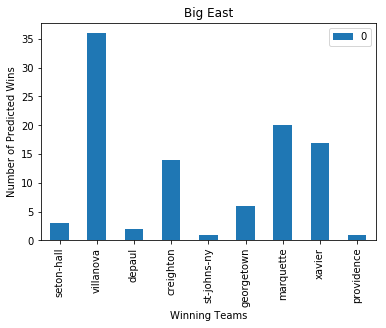

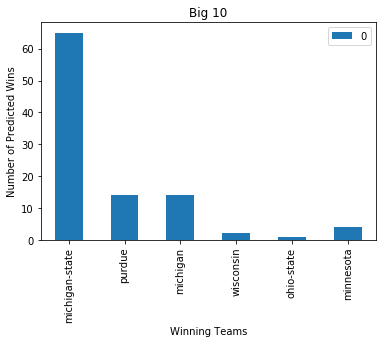

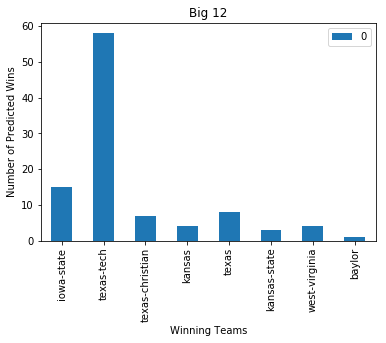

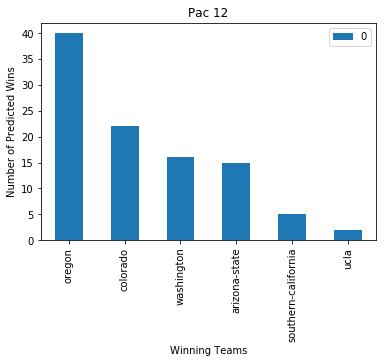

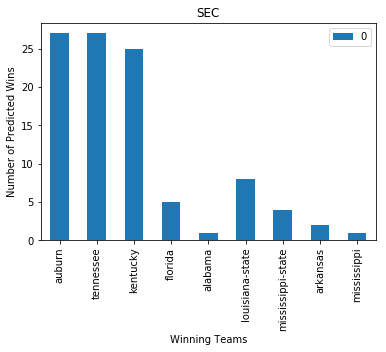

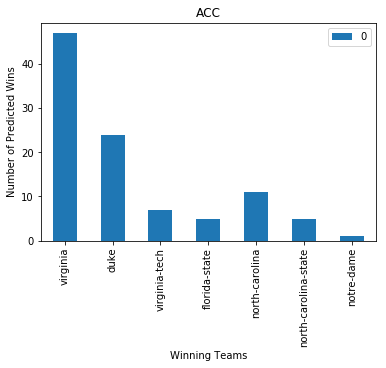

In [203]:
# This will count the number of instances of each winner
letter_counts_BE = Counter(bigEastWinner)
letter_counts_B10 = Counter(big10Winner)
letter_counts_B12 = Counter(big12Winner)
letter_counts_P12 = Counter(pac12Winner)
letter_counts_SEC = Counter(secWinner)
letter_counts_ACC = Counter(accWinner)

# create a datraframe from the dictionary we generated above
dfBE = pd.DataFrame.from_dict(letter_counts_BE, orient='index')
dfB10 = pd.DataFrame.from_dict(letter_counts_B10, orient='index')
dfB12 = pd.DataFrame.from_dict(letter_counts_B12, orient='index')
dfP12 = pd.DataFrame.from_dict(letter_counts_P12, orient='index')
dfSEC = pd.DataFrame.from_dict(letter_counts_SEC, orient='index')
dfACC = pd.DataFrame.from_dict(letter_counts_ACC, orient='index')

# plot the dataframes
ax1 = dfBE.plot( kind='bar' , title='Big East')
ax1.set_xlabel("Winning Teams")
ax1.set_ylabel("Number of Predicted Wins")

ax2 = dfB10.plot(kind='bar', title='Big 10')
ax2.set_xlabel("Winning Teams")
ax2.set_ylabel("Number of Predicted Wins")

ax3 = dfB12.plot(kind='bar', title='Big 12')
ax3.set_xlabel("Winning Teams")
ax3.set_ylabel("Number of Predicted Wins")

ax4 = dfP12.plot(kind='bar' , title='Pac 12')
ax4.set_xlabel("Winning Teams")
ax4.set_ylabel("Number of Predicted Wins")

ax5 = dfSEC.plot(kind='bar', title='SEC')
ax5.set_xlabel("Winning Teams")
ax5.set_ylabel("Number of Predicted Wins")

ax6 = dfACC.plot(kind='bar', title='ACC')
ax6.set_xlabel("Winning Teams")
ax6.set_ylabel("Number of Predicted Wins")

We want to compare our results with other forms of selecting winners

In [204]:
# This will count the number of instances of each winner for even odds
letter_counts_BEEven = Counter(bigEastWinnerEven)
letter_counts_B10Even = Counter(big10WinnerEven)
letter_counts_B12Even = Counter(big12WinnerEven)
letter_counts_P12Even = Counter(pac12WinnerEven)
letter_counts_SECEven = Counter(secWinnerEven)
letter_counts_ACCEven = Counter(accWinnerEven)

# create a datraframe from the dictionary we generated above
dfBEEven = pd.DataFrame.from_dict(letter_counts_BEEven, orient='index')
dfB10Even = pd.DataFrame.from_dict(letter_counts_B10Even, orient='index')
dfB12Even = pd.DataFrame.from_dict(letter_counts_B12Even, orient='index')
dfP12Even = pd.DataFrame.from_dict(letter_counts_P12Even, orient='index')
dfSECEven = pd.DataFrame.from_dict(letter_counts_SECEven, orient='index')
dfACCEven = pd.DataFrame.from_dict(letter_counts_ACCEven, orient='index')

# This will count the number of instances of each winner for random selection
letter_counts_BERand = Counter(bigEastWinnerRand)
letter_counts_B10Rand = Counter(big10WinnerRand)
letter_counts_B12Rand = Counter(big12WinnerRand)
letter_counts_P12Rand = Counter(pac12WinnerRand)
letter_counts_SECRand = Counter(secWinnerRand)
letter_counts_ACCRand = Counter(accWinnerRand)

# create a datraframe from the dictionary we generated above
dfBERand = pd.DataFrame.from_dict(letter_counts_BERand, orient='index')
dfB10Rand = pd.DataFrame.from_dict(letter_counts_B10Rand, orient='index')
dfB12Rand = pd.DataFrame.from_dict(letter_counts_B12Rand, orient='index')
dfP12Rand = pd.DataFrame.from_dict(letter_counts_P12Rand, orient='index')
dfSECRand = pd.DataFrame.from_dict(letter_counts_SECRand, orient='index')
dfACCRand = pd.DataFrame.from_dict(letter_counts_ACCRand, orient='index')





## How Many times are each Right?

In [212]:
BigEastAccuracy = pd.DataFrame(columns=['Model' , 'Random' , 'Even Odds'])
Big10Accuracy = pd.DataFrame(columns=['Model' , 'Random' , 'Even Odds'])
Big12Accuracy = pd.DataFrame(columns=['Model' , 'Random' , 'Even Odds'])
pac12Accuracy = pd.DataFrame(columns=['Model' , 'Random' , 'Even Odds'])
secAccuracy = pd.DataFrame(columns=['Model' , 'Random' , 'Even Odds'])
accAccuracy = pd.DataFrame(columns=['Model' , 'Random' , 'Even Odds'])


accuracy = pd.DataFrame(columns=['Model' , 'Random' , 'Even Odds'])

val = max(dfBE.loc['villanova'])
val2 = max(dfBERand.loc['villanova'])
val3 = max(dfBEEven.loc['villanova'])
BigEastAccuracy.loc[100] = [val,val2,val3]
accuracy.loc["Big East"] = [val,val2,val3]

val4 = max(dfB10.loc['michigan-state'])
val5 = max(dfB10Rand.loc['michigan-state'])
val6 = max(dfB10Even.loc['michigan-state'])
Big10Accuracy.loc[100] = [val4,val5,val6]
accuracy.loc["Big 10"] = [val4,val5,val6]

val7 = max(dfB12.loc['texas-tech'])
val8 = max(dfB12Rand.loc['texas-tech'])
val9 = max(dfB12Even.loc['texas-tech'])
Big12Accuracy.loc[100] = [val7,val8,val9]
accuracy.loc["Big 12"] = [val7,val8,val9]

val10 = max(dfP12.loc['oregon'])
val11 = max(dfP12Rand.loc['oregon'])
val12 = max(dfP12Even.loc['oregon'])
pac12Accuracy.loc[100] = [val10,val11,val12]
accuracy.loc["Pac 12"] = [val10,val11,val12]

val13 = max(dfSEC.loc['auburn'])
val14 = max(dfSECRand.loc['auburn'])
val15 = max(dfSECEven.loc['auburn'])
secAccuracy.loc[100] = [val13,val14,val15]
accuracy.loc["SEC"] = [val13,val14,val15]

val16 = max(dfACC.loc['duke'])
val17 = max(dfACCRand.loc['duke'])
val18 = max(dfACCEven.loc['duke'])
accAccuracy.loc[100] = [val16,val17,val18]
accuracy.loc["ACC"] = [val16,val17,val18]



## Demonstrate accuracy of winner selection through the Model 

Text(0.5, 0, 'Conference')

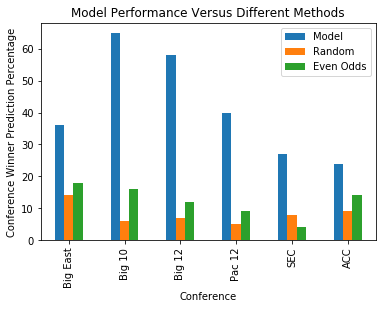

In [224]:
ax2 = accuracy.plot( kind='bar' , title='Model Performance Versus Different Methods')
ax2.set_ylabel("Conference Winner Prediction Percentage")
ax2.set_xlabel("Conference")

In [207]:
secAccuracy

,Model,Random,Even Odds
100,27,8,4


In [208]:
BigEastAccuracy

,Model,Random,Even Odds
100,36,14,18


In [209]:
Big12Accuracy

,Model,Random,Even Odds
100,58,7,12


In [210]:
Big10Accuracy

,Model,Random,Even Odds
100,65,6,16


In [211]:
pac12Accuracy

,Model,Random,Even Odds
100,40,5,9


In [225]:
accAccuracy


,Model,Random,Even Odds
100,24,9,14
